# Objective
Train a model to predict whether a mushroom is poisonous or not. 

This dataset has already been cleaned.

# Data

We have one table called data_vs_wild.csv, and it contains 1,000,000 observations from mushrooms in the wild, with information on features such as color and shape. Each one is labeled as safe or poisonous.

Note: This dataset was adapted from a dataset provided under the CC0 license here. It has been significantly altered to better reflect what you’d see on a real take-home challenge. (In other words, do not expect any previous papers or scripts written for the original dataset to apply to this one.)

### Data Dictionary:

* safe – 1=safe to nom,0=poisonous
* cap-shape – bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
* cap-surface – fibrous=f,grooves=g,scaly=y,smooth=s
* cap-color – brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
* bruises – bruises=t,no=f
* odor – almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
* gill-attachment – attached=a,descending=d,free=f,notched=n
* gill-spacing – close=c,crowded=w,distant=d
* gill-size – broad=b,narrow=n
* gill-color – black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
* stalk-shape – enlarging=e,tapering=t
* stalk-root – bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
* stalk-surface-above-ring – fibrous=f,scaly=y,silky=k,smooth=s
* stalk-surface-below-ring – fibrous=f,scaly=y,silky=k,smooth=s
* stalk-color-above-ring – brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
* stalk-color-below-ring – brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
* veil-type – partial=p,universal=u
* veil-color – brown=n,orange=o,white=w,yellow=y
* ring-number – none=n,one=o,two=t
* ring-type – cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
* spore-print-color – black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
* population – abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
* habitat – grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# 1. Import libraries

In [9]:
# numpy for computation
import numpy as np

# pandas for dataframes
import pandas as pd
pd.set_option('display.max_columns', 100)

# matplotlib for visualization config
from matplotlib import pyplot as plt
%matplotlib inline

# seaborn for easy visualization
import seaborn as sns
sns.set_style('darkgrid')

# train_test_split method
from sklearn.model_selection import train_test_split

# random forest classifier algo
from sklearn.ensemble import RandomForestClassifier

# scoring metric
from sklearn.metrics import roc_auc_score, roc_curve

# resample method for imbalanced classes
from sklearn.utils import resample


In [10]:
# csv to dataframe 
df = pd.read_csv('data_vs_wild.csv')
df.head(3)

,safe,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,f,f,e,f,s,a,c,n,b,e,?,s,k,p,w,p,y,o,e,w,v,l
1,0,x,f,y,f,p,a,c,n,u,e,e,k,k,g,p,p,n,t,l,h,y,w
2,0,b,g,n,t,n,f,c,b,k,e,b,k,y,g,g,p,w,o,f,w,v,m


# 2. Data exploration

In [11]:
# get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   safe                      1000000 non-null  int64 
 1   cap-shape                 1000000 non-null  object
 2   cap-surface               1000000 non-null  object
 3   cap-color                 1000000 non-null  object
 4   bruises                   1000000 non-null  object
 5   odor                      1000000 non-null  object
 6   gill-attachment           1000000 non-null  object
 7   gill-spacing              1000000 non-null  object
 8   gill-size                 1000000 non-null  object
 9   gill-color                1000000 non-null  object
 10  stalk-shape               1000000 non-null  object
 11  stalk-root                1000000 non-null  object
 12  stalk-surface-above-ring  1000000 non-null  object
 13  stalk-surface-below-ring  1000000 non-null 

In [12]:
# get info
df.describe(include='object')

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,f,f,c,n,b,t,b,k,k,w,w,p,w,o,e,w,v,d
freq,301106,346351,180545,668946,330047,747593,735686,533439,261334,506740,337137,408020,398845,274117,270045,1000000,623665,652742,325713,286068,445866,233038


__All features are categorical. Too many to deal with sparse categories.__

__Decision to create abt with dummy features.__

# 3. Feature engineering
Create analytical base table

In [13]:
# abt
abt = pd.get_dummies(df, drop_first=True)

# 4. Machine learning
1. split data into feature and target (X and y)
2. split X and y into X_train, X_test, y_train, y_test
3. fit and train classifier
4. generate predictions
5. evaluate

In [14]:
# initialize X and y variables
X = abt.drop('safe', axis=1)
y = abt.safe

print('X shape', X.shape)
print('y shape', y.shape)

X shape (1000000, 95)
y shape (1000000,)


In [15]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=abt.safe, random_state=123)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (750000, 95)
y_train (750000,)
X_test (250000, 95)
y_test (250000,)


In [16]:
# initialize random forest classifier
clf = RandomForestClassifier(random_state=123)

# fit model to X
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=123)

In [17]:
# generate predictions
pred = clf.predict_proba(X_test)
pred = [p[1] for p in pred]

In [18]:
# calculate auroc
auroc = roc_auc_score(y_test, pred)
print( auroc )

0.9063434638094472


# 5. Dealing with imbalanced classes

In this scenario, we should only up/down-sample for the training set, not the test set. The test set should still represent the same proportion of safe/poisonous mushrooms that would be found in the wild.

In [19]:
# rebuild train
train = X_train.copy()
train['safe'] = y_train

# minority and majority class tables
train_minority = train[train.safe == 1]
train_majority = train[train.safe == 0]

## 5.1  Upsampling

In [20]:
# upsample minority
minority_upsampled = resample(train_minority, 
                              replace=True, 
                              n_samples=len(train_majority), 
                              random_state=123)

# combine majority with upsampled minority
train_upsampled = pd.concat([train_majority, minority_upsampled])

# display value counts
train_upsampled.safe.value_counts()

1    746881
0    746881
Name: safe, dtype: int64

In [21]:
X_train_us = train_upsampled.drop('safe', axis=1)
y_train_us = train_upsampled.safe

In [22]:
clf_us = RandomForestClassifier(random_state=123)
clf_us.fit(X_train_us, y_train_us)

RandomForestClassifier(random_state=123)

In [23]:
pred_us = clf_us.predict_proba(X_test)
pred_us = [p[1] for p in pred_us]

In [24]:
# calculate auroc
auroc_us = roc_auc_score(y_test, pred_us)
print( auroc_us )

0.9176218800981314


## 5.2 Downsampling

In [25]:
# downsample majority
majority_downsampled = train_majority.sample(n=len(train_minority),
                                            random_state=321)

# combine majority with trained minority 
train_downsampled = pd.concat([train_minority, majority_downsampled])

# display value counts
train_downsampled.safe.value_counts()

1    3119
0    3119
Name: safe, dtype: int64

In [26]:
# New X_train and y_train for downsampled (_ds)
y_train_ds = train_downsampled.safe
X_train_ds = train_downsampled.drop('safe', axis=1)

In [27]:
# Train new classifer (downsampled train set)
clf_ds = RandomForestClassifier(random_state=1234)
clf_ds.fit(X_train_ds, y_train_ds)

RandomForestClassifier(random_state=1234)

In [28]:
pred_ds = clf_ds.predict_proba(X_test)
pred_ds = [p[1] for p in pred_ds]

In [29]:
auroc_ds = roc_auc_score(y_test, pred_ds)
print( auroc_ds )

0.9465168987603816


## 5.3 Compare models

Calculate false positive and true positive rates

In [30]:
# benchmark
fpr, tpr, threshold = roc_curve(y_test, pred)

# upsampled
fpr_us, tpr_us, threshold_us = roc_curve(y_test, pred_us)

# downsampled
fpr_ds, tpr_ds, threshold_ds = roc_curve(y_test, pred_ds)

plot roc curves

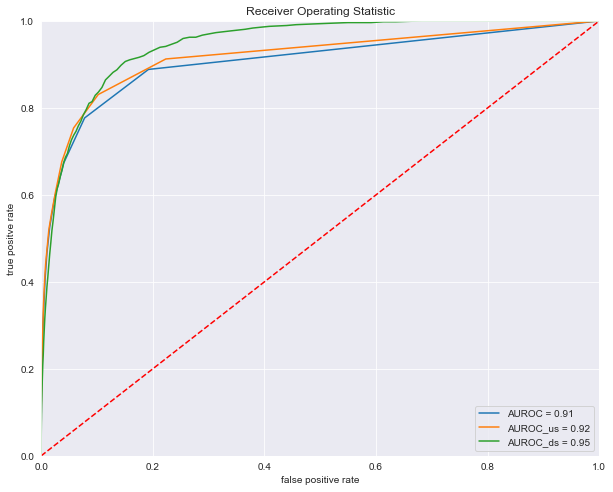

In [31]:
plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Statistic')

plt.plot(fpr, tpr, label = 'AUROC = %0.2f' % auroc)
plt.plot(fpr_us, tpr_us,label = 'AUROC_us = %0.2f' % auroc_us)
plt.plot(fpr_ds, tpr_ds, label = 'AUROC_ds = %0.2f' % auroc_ds)

plt.plot([0,1], [0,1], 'r--')

plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('false positive rate')
plt.ylabel('true positve rate')
plt.legend(loc = 'lower right')

plt.show()


# 6. Conclusion

When the threshold is high (left side of the chart), all models perform similarly. The false positive rate is low, but so is the true positive rate. This means that although we won't be eating many poisonous mushrooms, we also won't risk eating many in general.

However, if we decrease the threshold, the downsampled model proves to be more useful. For example, if we can endure a FPR of 10%, we can achieve a true positive rate of 90%.

This threshold will depend on how much poison we can sustain without starving.

